In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 9C30-9931

 Directorio de C:\Users\erik_\Curso-IA-Udemy\Regresión Logisitica

19/07/2021  23:08    <DIR>          .
19/07/2021  23:08    <DIR>          ..
19/07/2021  22:34    <DIR>          .ipynb_checkpoints
19/07/2021  23:08           235.139 Ejemplo con titanic.ipynb
18/07/2021  00:11            70.438 presicion.png
18/07/2021  00:07            50.879 RL1.png
18/07/2021  00:10            74.546 RL2.png
18/07/2021  00:11            61.194 train.csv
18/07/2021  00:05               767 untitled.txt
               6 archivos        492.963 bytes
               3 dirs  69.000.400.896 bytes libres


In [3]:
entrenamiento = pd.read_csv("train.csv")

In [4]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

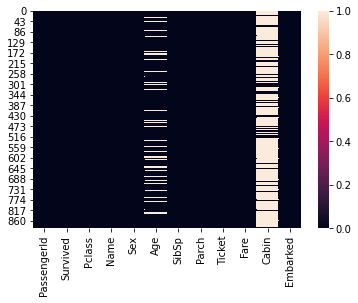

In [5]:
#para saber que columna tiene más valores nulos de forma grafica
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

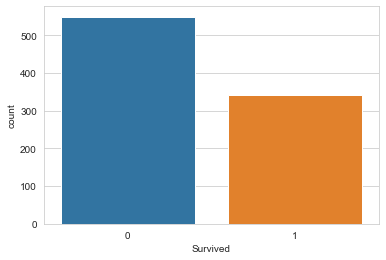

In [6]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=entrenamiento)

<AxesSubplot:xlabel='Survived', ylabel='count'>

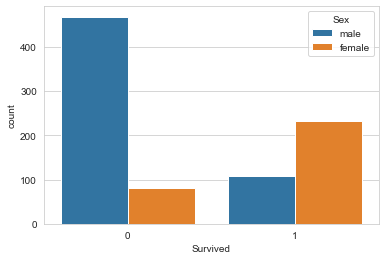

In [7]:

sns.countplot(x="Survived",data=entrenamiento, hue="Sex")

In [8]:
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

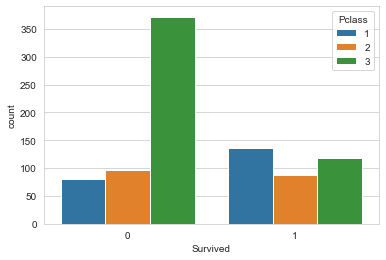

In [9]:

sns.countplot(x="Survived",data=entrenamiento, hue="Pclass")

H:\programasparapython\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

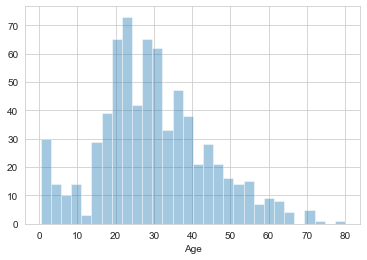

In [10]:
sns.distplot(entrenamiento["Age"].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

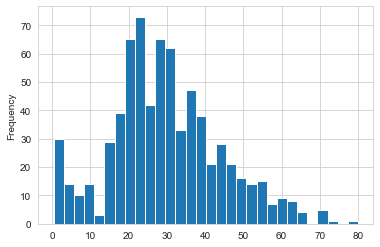

In [11]:
entrenamiento["Age"].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

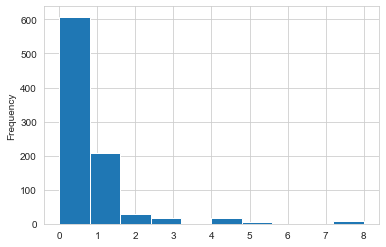

In [12]:
#numero de familiares a bordo
entrenamiento["SibSp"].plot.hist(bins=10)

In [13]:
import cufflinks as cf

In [14]:
cf.go_offline()

In [15]:
#ver tarifa utilizando Iplot(metodo de cufflinks) para hacerlo interactivo.
entrenamiento["Fare"].iplot(kind="hist",bins=40)

<AxesSubplot:>

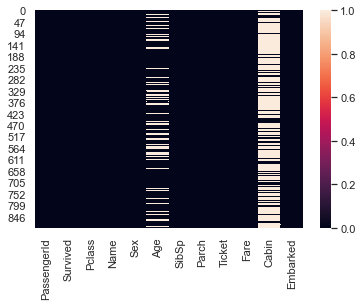

In [16]:

sns.set_theme() #resetear el estilo
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

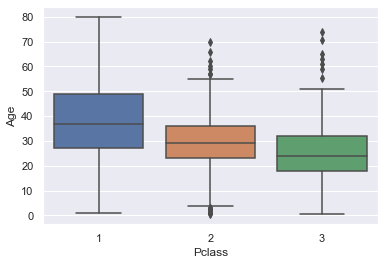

In [17]:
#calcular la edad media para ponerlo en el nulo

sns.boxplot(x="Pclass",y="Age",data=entrenamiento)


In [18]:
#la edad media para la clae 1 es de 38 masomenos y los demas lo mismo


In [19]:
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        if clase == 2:
            return 30
        if clase == 3:
            return 25
    else:
        return edad

In [20]:
entrenamiento["Age"] = entrenamiento[["Age","Pclass"]].apply(edad_media,axis=1)

<AxesSubplot:>

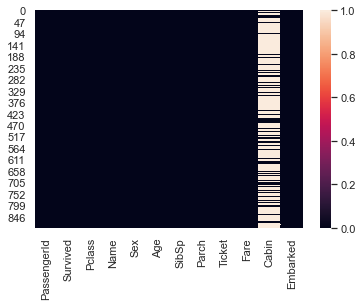

In [21]:
sns.set_theme() #resetear el estilo
sns.heatmap(entrenamiento.isnull())
# ya no tienen valores nulos (en edad)

In [22]:
# Cabin casi no tiene valores, asi que la eliminamos
entrenamiento.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

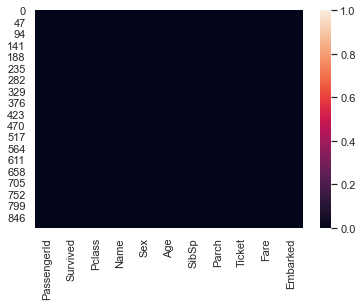

In [23]:
sns.set_theme()
sns.heatmap(entrenamiento.isnull())
# ya no hay valores nulos

In [24]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
#nos interesa dejar solo las numericas. Tambien el id, no es util
entrenamiento.drop(["Name","Ticket","PassengerId"],axis=1,inplace=True)

In [26]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
# Cambiar valor de genero, male = 1, female = 0

pd.get_dummies(entrenamiento["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [28]:
#eliminamos una columna, ya que con saber el valor de una no hace falta la otra.

In [29]:
sexo = pd.get_dummies(entrenamiento["Sex"], drop_first=True)
sexo

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
entrenamiento = pd.concat([entrenamiento,sexo], axis=1) #axis1 = columna , 0 = fila

In [31]:
entrenamiento

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,25.0,1,2,23.4500,S,0
889,1,1,male,26.0,0,0,30.0000,C,1


In [32]:
entrenamiento.drop("Sex",axis=1,inplace=True)
entrenamiento

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1
887,1,1,19.0,0,0,30.0000,S,0
888,0,3,25.0,1,2,23.4500,S,0
889,1,1,26.0,0,0,30.0000,C,1


In [33]:
puerto_de_embarque = pd.get_dummies(entrenamiento["Embarked"])
puerto_de_embarque

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [34]:
# podemos hacer lo mismo que con sxo, eliminar una para comparar dos nomás.
puerto_de_embarque = pd.get_dummies(entrenamiento["Embarked"], drop_first=True)

In [35]:
puerto_de_embarque

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [36]:
entrenamiento = pd.concat([entrenamiento,puerto_de_embarque], axis=1) #axis1 = columna , 0 = fila

In [38]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [39]:
entrenamiento.drop("Embarked",axis=1,inplace=True)

In [40]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Entrenamiento del modelo

In [41]:
# crear caracteristicas y valor objetivo (si sobrevive o no sobrevive segun las caracteristicas)

In [55]:
y = entrenamiento["Survived"] # Y seria lo que queremos predecir, el objetivo

In [56]:
x = entrenamiento.drop(("Survived"), axis=1) 
# X serian las caracteristicas o detalles, necesitamos todo menos si sobrevivio o no

In [57]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [58]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [78]:
# toca dividir el dataset en entrenamiento y en test

from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=45)

In [80]:
# para entrenar el modelo importamos
from sklearn.linear_model import LogisticRegression

In [117]:
modelo = LogisticRegression()
modelo.max_iter = 1000 #1000 pasos de aprendizaje

In [118]:
modelo.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [119]:
predicciones = modelo.predict(x_test)

In [120]:
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [121]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
422    0
815    0
466    0
559    1
6      0
Name: Survived, Length: 268, dtype: int64

In [122]:
from sklearn.metrics import classification_report 

In [123]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.78      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268



In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicciones)
# el primer valor son los positivos correctos
# el cuarto los positivos incorrectos
# el tercero los falsos positivos
# el segundo los falsos negativos

array([[152,  26],
       [ 20,  70]], dtype=int64)